<div align="center">
    <h1><b><u>TRAFFIC OPTIMIZATION</u></b></h1>
</div>


**GROUP NUMBER: 7**
     
**GROUP MEMBERS**
   
- **Adebola**
- **Rahim**
- **Sayeed**
- **Yinka**
- **Minto**
   

<div align="center">
    <h3><b><u>5. Feature Selection</u></b></h3>
</div>


### 1. Load The Dataset

In [1]:
# Import Libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [2]:
# Load the encoded dataset 
data = pd.read_csv('data/encoded_data.csv')

In [3]:
data.head()

,ROAD_CLASS,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,INVTYPE,INVAGE,INJURY,...,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,DIVISION,DISTRICT_North York,DISTRICT_Scarborough,DISTRICT_Toronto and East York,ACCLASS_Non-Fatal Injury,ACCLASS_Property Damage O
0,0.731234,0.084613,0.479823,0.864958,0.197605,0.165638,0.050588,0.152398,52.0,2,...,0.595664,0.764625,0.723427,0.81495,0.080709,False,False,True,True,False
1,0.731234,0.084613,0.479823,0.864958,0.197605,0.165638,0.050588,0.152398,17.0,1,...,0.595664,0.764625,0.723427,0.81495,0.080709,False,False,True,True,False
2,0.731234,0.084613,0.479823,0.864958,0.197605,0.165638,0.050588,0.457193,57.0,1,...,0.595664,0.764625,0.723427,0.81495,0.080709,False,False,True,True,False
3,0.731234,0.084613,0.479823,0.864958,0.197605,0.165638,0.050588,0.152398,22.0,1,...,0.595664,0.764625,0.723427,0.81495,0.080709,False,False,True,True,False
4,0.731234,0.084613,0.479823,0.864958,0.197605,0.165638,0.050588,0.152398,17.0,1,...,0.595664,0.764625,0.723427,0.81495,0.080709,False,False,True,True,False


### 2. Feature Selection using Random Forest Feature Importance

In [4]:
# Define X (features) and y (target)
X = data.drop(columns=['INJURY'])
y = data['INJURY']

In [5]:
# Random Forest feature selector
rf_selector = RandomForestClassifier(random_state=42)
rf_selector.fit(X, y)

RandomForestClassifier(random_state=42)

In [6]:
# Use SelectFromModel on the same DataFrame
selector = SelectFromModel(rf_selector, prefit=True)
rf_features = X.columns[selector.get_support()]
X_selected = selector.transform(X)

In [7]:
# Create a DataFrame with feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_selector.feature_importances_
})


In [8]:
# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# View top N features
print(importance_df.head(20))  # Show top 10

                           Feature  Importance
8                           INVAGE    0.173875
18        ACCLASS_Non-Fatal Injury    0.114758
14                        DIVISION    0.099325
6                        IMPACTYPE    0.096560
7                          INVTYPE    0.085050
9                          INITDIR    0.053551
4                            LIGHT    0.052331
2                         TRAFFCTL    0.040497
10                         VEHTYPE    0.035952
12                         DRIVACT    0.035385
0                       ROAD_CLASS    0.034281
1                           ACCLOC    0.032232
13                        DRIVCOND    0.028978
11                       MANOEUVER    0.028167
5                         RDSFCOND    0.024753
3                       VISIBILITY    0.017203
15             DISTRICT_North York    0.016934
16            DISTRICT_Scarborough    0.015160
17  DISTRICT_Toronto and East York    0.014017
19       ACCLASS_Property Damage O    0.000992


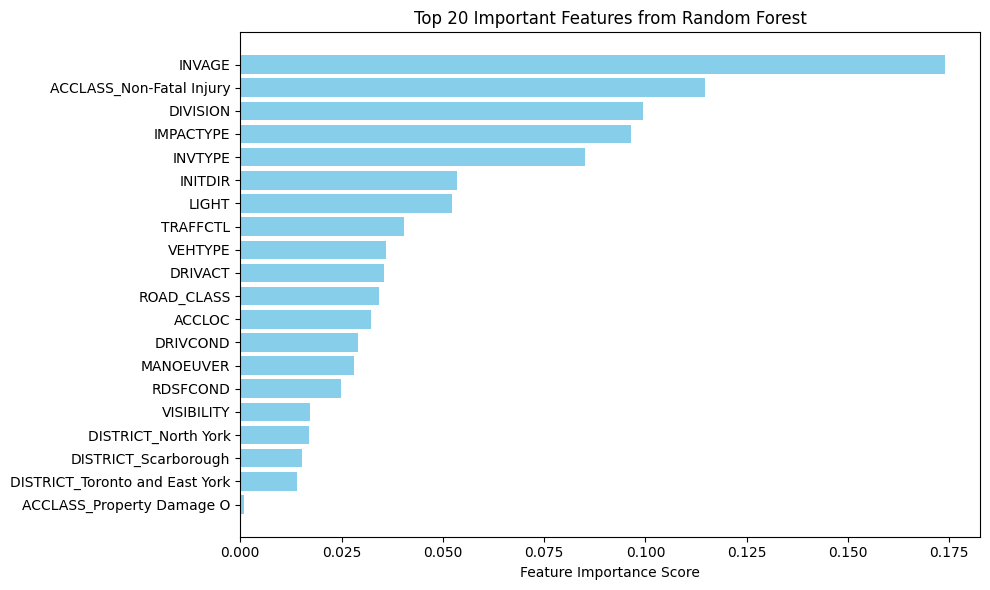

In [9]:
import matplotlib.pyplot as plt

# Plot top 15 important features
top_n = 20
top_features = importance_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest at top
plt.title(f'Top {top_n} Important Features from Random Forest')
plt.xlabel('Feature Importance Score')
plt.tight_layout()
plt.show()


### 3. Feature Selection using Chi-Square

In [10]:
# Define X (features) and y (target)
X = data.drop(columns=['INJURY'])
y = data['INJURY']

In [11]:
# Select top 20 features using Chi-Square
selector = SelectKBest(score_func=chi2, k=20)
X_selected = selector.fit_transform(X, y)

In [12]:
# Get selected feature names and scores
selected_feature_names = X.columns[selector.get_support()]
selected_feature_scores = selector.scores_[selector.get_support()]

In [13]:
# Sort by score (descending)
sorted_indices = selected_feature_scores.argsort()[::-1]
sorted_names = selected_feature_names[sorted_indices]
sorted_scores = selected_feature_scores[sorted_indices]

In [14]:
# Print sorted features
print("\nTop 20 features selected by Chi-Square Test (sorted):")
for name, score in zip(sorted_names, sorted_scores):
    print(f"{name}: {score:.2f}")


Top 20 features selected by Chi-Square Test (sorted):
INVAGE: 3305.27
ACCLASS_Non-Fatal Injury: 890.22
DISTRICT_Toronto and East York: 110.62
IMPACTYPE: 91.40
DISTRICT_Scarborough: 38.65
MANOEUVER: 33.22
INVTYPE: 30.48
VEHTYPE: 26.32
INITDIR: 15.14
DISTRICT_North York: 8.94
ROAD_CLASS: 6.82
DRIVACT: 4.72
ACCLASS_Property Damage O: 4.24
ACCLOC: 3.83
DRIVCOND: 2.48
LIGHT: 2.44
TRAFFCTL: 0.73
VISIBILITY: 0.63
RDSFCOND: 0.26
DIVISION: 0.04


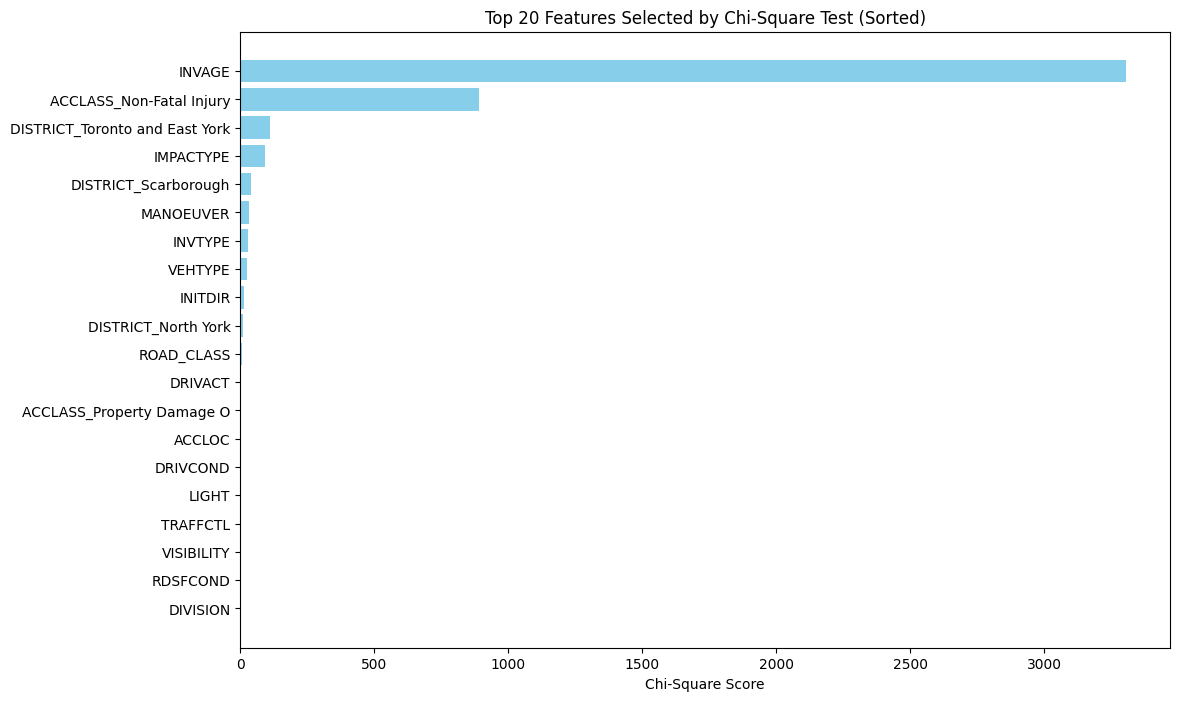

In [15]:
# Plot sorted feature scores
plt.figure(figsize=(12, 8))
plt.barh(sorted_names, sorted_scores, color='skyblue')
plt.xlabel('Chi-Square Score')
plt.title('Top 20 Features Selected by Chi-Square Test (Sorted)')
plt.gca().invert_yaxis()
plt.show()

### 4. Combined Feature Selection Strategy

In [16]:
# Union of both sets
combined_features = list(set(selected_feature_names).union(set(rf_features)))
print("Combined feature count:", len(combined_features))
print("Combined Features:\n", combined_features)


Combined feature count: 20
Combined Features:
 ['DISTRICT_North York', 'ACCLASS_Property Damage O', 'TRAFFCTL', 'MANOEUVER', 'DIVISION', 'RDSFCOND', 'DISTRICT_Toronto and East York', 'VEHTYPE', 'ACCLOC', 'DRIVACT', 'VISIBILITY', 'DRIVCOND', 'INVTYPE', 'ROAD_CLASS', 'LIGHT', 'INITDIR', 'IMPACTYPE', 'DISTRICT_Scarborough', 'ACCLASS_Non-Fatal Injury', 'INVAGE']


In [17]:
X_combined = X[combined_features]

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Try cross-validation with Random Forest
model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X_combined, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


Cross-Validation Accuracy: 0.8404 ± 0.0051


To enhance model robustness and improve prediction accuracy, we combined features selected from both the **Chi-Square Test** and **Random Forest** feature importance methods.

- **Chi-Square Test** identified features with strong statistical dependence on the target variable.
- **Random Forest** identified features with high predictive power based on model-based importance.
- We combined both sets using a union approach, resulting in a hybrid feature set with better representation of both linear and non-linear relationships.

#### Result:
Using the combined feature set, we trained a Random Forest classifier and evaluated it using 5-fold cross-validation.

- **Cross-Validation Accuracy:** **84.04% ± 0.51%**

This hybrid approach strikes a balance between interpretability and predictive strength, and forms the foundation for training and tuning the final model.
